In [65]:
import pandas as pd
teams = pd.read_csv("teams.csv")

In [66]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [67]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [68]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [69]:
teams = teams.dropna()

In [70]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [71]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >=2012].copy()

In [93]:
train.shape

(1609, 7)

In [265]:
train_x = np.column_stack((train["athletes"], train["prev_medals"]))

In [266]:
train_x

array([[ 8.,  0.],
       [ 5.,  0.],
       [ 8.,  0.],
       ...,
       [26.,  0.],
       [14.,  0.],
       [16.,  3.]])

In [280]:
test_x = np.column_stack((test["athletes"], test["prev_medals"]))

In [269]:
y = np.array(train["medals"])

In [270]:
y

array([0, 0, 0, ..., 0, 3, 4], dtype=int64)

In [282]:
test_y = np.array(test["medals"])

In [272]:
model = keras.Sequential([keras.layers.Dense(1, input_shape=
                                             (2,))])

In [274]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [289]:
model.fit(train_x, y, epochs=200)

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.0722 - loss: 180.6131
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.0836 - loss: 153.8472
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.0802 - loss: 145.5612
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0856 - loss: 171.4975
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0822 - loss: 198.4650
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0857 - loss: 161.1457
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0892 - loss: 154.6727
Epoch 8/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.0916 - loss: 232.3591
Epoch 9/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0963 - loss: 195.7997
Epoch 10/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0710 - loss: 141.7845
Epoch 11/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0837 - loss: 163.2639
Epoch 12/200
51/51 ━━━━━━━━━━━━

In [295]:
predictions = model.predict(test_x)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [296]:
test["predictions"] = predictions

In [297]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.716365
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-0.929816
24,ALB,Albania,2012,10,25.7,0.0,0,-1.190832
25,ALB,Albania,2016,6,23.7,0.0,0,-1.475434
37,ALG,Algeria,2012,39,24.8,2.0,1,2.390670
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.688885
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.404283
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.404283
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.774294


In [298]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,287.745209
2054,USA,United States,2016,719,26.4,248.0,264,237.503967


In [299]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.134167
908,IND,India,2016,130,26.1,6.0,2,11.901642


In [304]:
errors = (test["medals"] - test["predictions"]).abs()

In [305]:
errors

6       1.716365
7       0.929816
24      1.190832
25      1.475434
37      1.390670
          ...   
2111    1.688885
2131    1.404283
2132    1.404283
2142    1.774294
2143    0.303329
Length: 405, dtype: float64

In [306]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    1.323090
ALB    1.333133
ALG    1.756269
AND    1.546584
ANG    0.320177
         ...   
VIE    1.237234
VIN    1.653310
YEM    1.653310
ZAM    1.404283
ZIM    1.038811
Length: 204, dtype: float64

In [307]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

<Axes: ylabel='Frequency'>

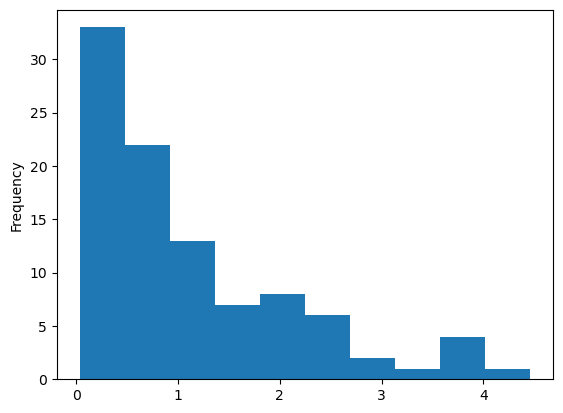

In [312]:
error_ratio = error_by_team/medals_by_team
error_ratio[~pd.isnull(error_ratio)]
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio
error_ratio.plot.hist()